## K-Means Project Tutorial

In [25]:
#!pip install -r ../requirements.txt

**Step 1:**

Install and import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df_raw = pd.read_csv(url)

**Step 2:**

Load the housing dataset and take a look at the first rows. Then create a new dataframe with only the 'latitude','longitude' and 'medincome' column to create our clusters.

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df = df_raw[['MedInc','Latitude','Longitude']]

In [6]:
df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [7]:
df.describe()

,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


In [8]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)
df_norm
#Note: In Machine Learning, StandardScaler is used to resize the distribution 
#of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1

array([[ 2.34476576,  1.05254828, -1.32783522],
       [ 2.33223796,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.03850269, -1.33282653],
       ...,
       [-1.14259331,  1.77823747, -0.8237132 ],
       [-1.05458292,  1.77823747, -0.87362627],
       [-0.78012947,  1.75014627, -0.83369581]])

In [24]:
#df_describe = pd.DataFrame(df_norm)
#df_describe.describe()
#Hice esto solo para ver si cambiaron las medias y desviaciones estándar

* Elbow method:

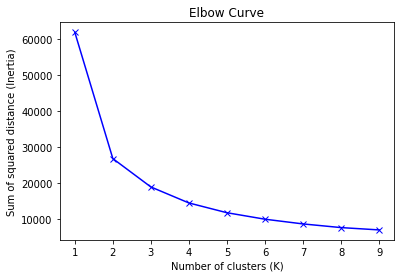

In [9]:
sum_distancias_cuadradas = []
# Inertia measures how well a dataset was clustered by K-Means. 
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance, 
# and summing these squares across one cluster. 
# A good model is one with low inertia AND a low number of clusters (K).


K = range(1,10)

for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    sum_distancias_cuadradas.append(kmeans.inertia_)
plt.plot(K,sum_distancias_cuadradas,'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distance (Inertia)')
plt.title('Elbow Curve')
plt.show()

# The optimum clusters is where the elbow occurs (K = 2).

* **Silhouette analysis**:
</br> The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 

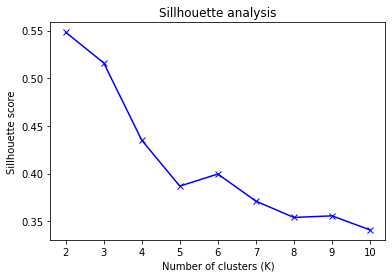

In [10]:
rango_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []

for num_clusters in rango_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_norm, cluster_labels))
plt.plot(rango_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sillhouette score')
plt.title('Sillhouette analysis')
plt.show()

#Highest score is 2.

Now that we have the optimum amount of clusters (k=2), we can move on to applying K-means clustering to the dataset.

**Step 3:**

Instantiate the kmeans algorithm.

In [11]:
model = KMeans(n_clusters = 2)
model.fit(df_norm)

KMeans(n_clusters=2)

In [12]:
df2 = scaler.inverse_transform(df_norm)
#To scale back the data to the original representation

In [16]:
df2 = pd.DataFrame(df2,columns=['MedInc','Latitude','Longitude'])

In [17]:
df2['Cluster'] = model.labels_

**Step 4:**

Convert your new 'cluster' column to 'category' type.

In [21]:
df2['Cluster']=pd.Categorical(df2['Cluster'])

**Step 5:**

Use seaborn's relplot to visualize your new clusters.

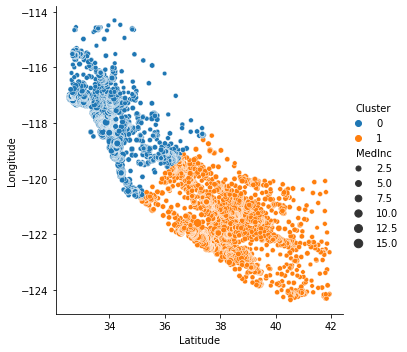

In [23]:
sns.relplot(x='Latitude', y='Longitude', data=df2, kind='scatter', size = 'MedInc',hue='Cluster')
plt.show()

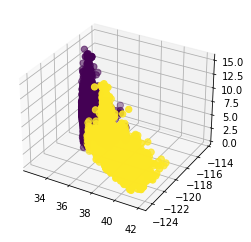

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df2['Latitude'])
y = np.array(df2['Longitude'])
z = np.array(df2['MedInc'])

ax.scatter(x,y,z, c=df2["Cluster"], s=40)

plt.show()